Importing Necessary libraries and Iris dataset

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from scipy.spatial.distance import pdist, squareform, mahalanobis
import time
from sklearn.decomposition import PCA

Loading Iris dataset

In [28]:
iris_df = pd.read_csv("/content/irisdata.csv")
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


Generate and display discriptive Statistics

In [29]:
descriptive_stats_all = iris_df.describe()
descriptive_stats_all

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Generate box plot for all data

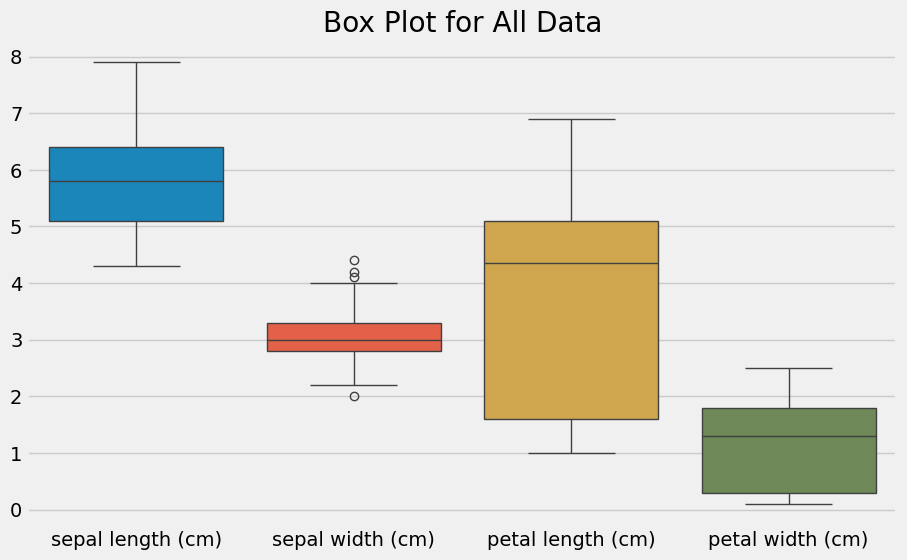

In [30]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=iris_df.iloc[:, :-1])
plt.title("Box Plot for All Data")
plt.show()

 Box plot for all attributes based on class

<ipython-input-31-65ec0f51c7f4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  plt1 = sns.boxplot(data=iris_df,x="sepal length (cm)", y="Class",palette=palette,  ax=axs[0][0])
<ipython-input-31-65ec0f51c7f4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  plt2 = sns.boxplot(data=iris_df,x="sepal width (cm)", y="Class",palette=palette, ax=axs[0][1])
<ipython-input-31-65ec0f51c7f4>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  plt3 = sns.boxplot(data=iris_df,x="petal length (cm)", y="Class",palette=palette, ax=axs[1][0])
<ipython-input-31-65ec0f51c7f4>:6: FutureWarning: 



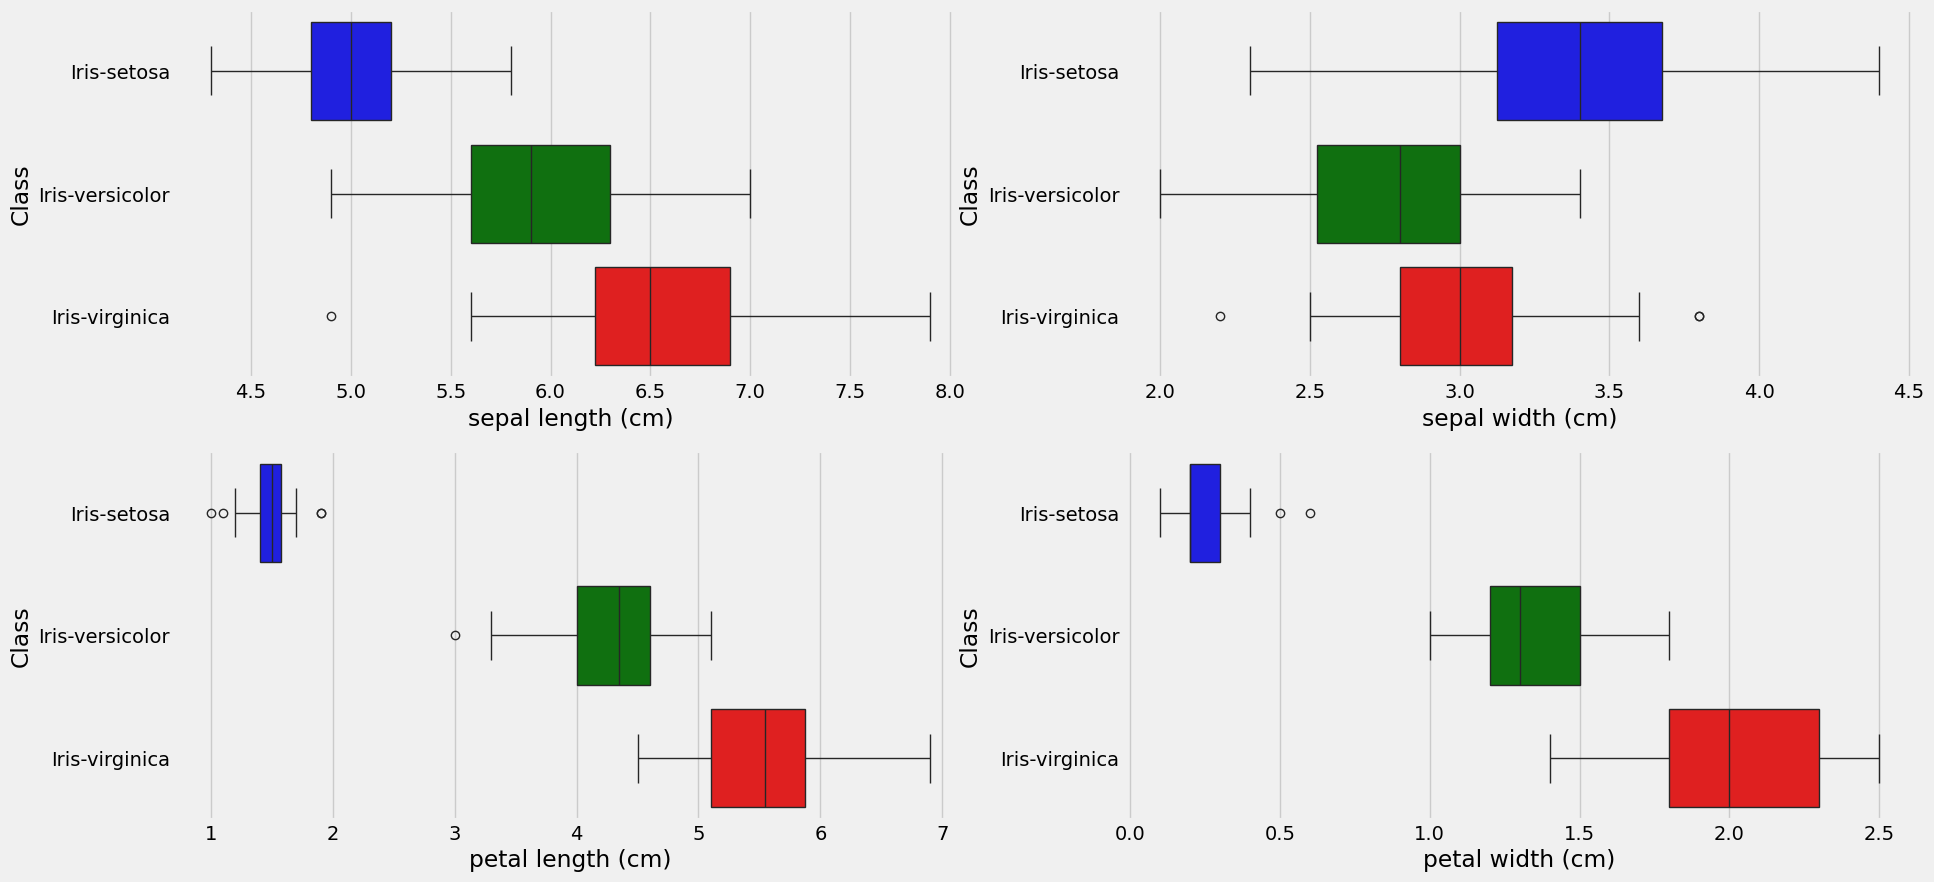

In [31]:
palette = {"Iris-setosa": "blue", "Iris-versicolor": "green", "Iris-virginica": "red"}
fig, axs = plt.subplots(2, 2, figsize=(20, 10))
plt1 = sns.boxplot(data=iris_df,x="sepal length (cm)", y="Class",palette=palette,  ax=axs[0][0])
plt2 = sns.boxplot(data=iris_df,x="sepal width (cm)", y="Class",palette=palette, ax=axs[0][1])
plt3 = sns.boxplot(data=iris_df,x="petal length (cm)", y="Class",palette=palette, ax=axs[1][0])
plt4 = sns.boxplot(data=iris_df,x="petal width (cm)", y="Class",palette=palette, ax=axs[1][1])

Descriptive Statistics and Box Plot for Random 50 Data

In [32]:
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Randomly sample 50 data points
iris_sample = iris_df.sample(n=50)
iris_sample

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Class
73,6.1,2.8,4.7,1.2,Iris-versicolor
18,5.7,3.8,1.7,0.3,Iris-setosa
118,7.7,2.6,6.9,2.3,Iris-virginica
78,6.0,2.9,4.5,1.5,Iris-versicolor
76,6.8,2.8,4.8,1.4,Iris-versicolor
31,5.4,3.4,1.5,0.4,Iris-setosa
64,5.6,2.9,3.6,1.3,Iris-versicolor
141,6.9,3.1,5.1,2.3,Iris-virginica
68,6.2,2.2,4.5,1.5,Iris-versicolor
82,5.8,2.7,3.9,1.2,Iris-versicolor


In [33]:
# Generate descriptive statistics for the random sample
descriptive_stats_sample = iris_sample.describe()
descriptive_stats_sample

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,50.00000,50.000000,50.000000,50.000000
mean,5.90000,3.150000,3.642000,1.160000
std,0.81866,0.455914,1.834487,0.797701
min,4.40000,2.200000,1.000000,0.100000
25%,5.25000,2.800000,1.500000,0.300000
50%,5.90000,3.100000,4.450000,1.350000
75%,6.47500,3.400000,5.100000,1.800000
max,7.90000,4.400000,6.900000,2.500000


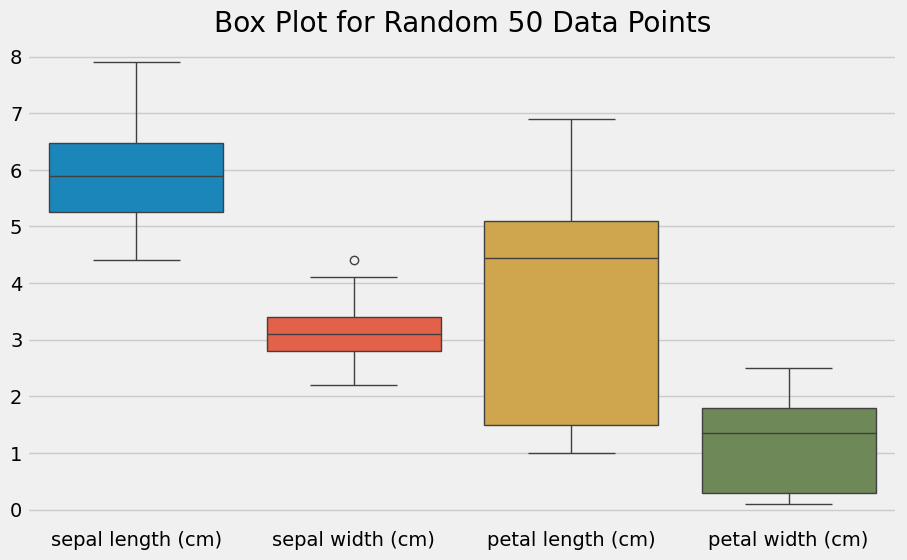

In [34]:
# Generate box plot for the sample
plt.figure(figsize=(10, 6))
sns.boxplot(data=iris_sample.iloc[:, :-1])
plt.title("Box Plot for Random 50 Data Points")
plt.show()

Box Plot for all attributes based on result for 50 random data

<ipython-input-35-ecb69e0e95c1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  plt1 = sns.boxplot(data=iris_sample,x="sepal length (cm)", y="Class",palette=palette,  ax=axs[0][0])
<ipython-input-35-ecb69e0e95c1>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  plt2 = sns.boxplot(data=iris_sample,x="sepal width (cm)", y="Class",palette=palette, ax=axs[0][1])
<ipython-input-35-ecb69e0e95c1>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  plt3 = sns.boxplot(data=iris_sample,x="petal length (cm)", y="Class",palette=palette, ax=axs[1][0])
<ipython-input-35-ecb69e0e95c1>:6: Futur

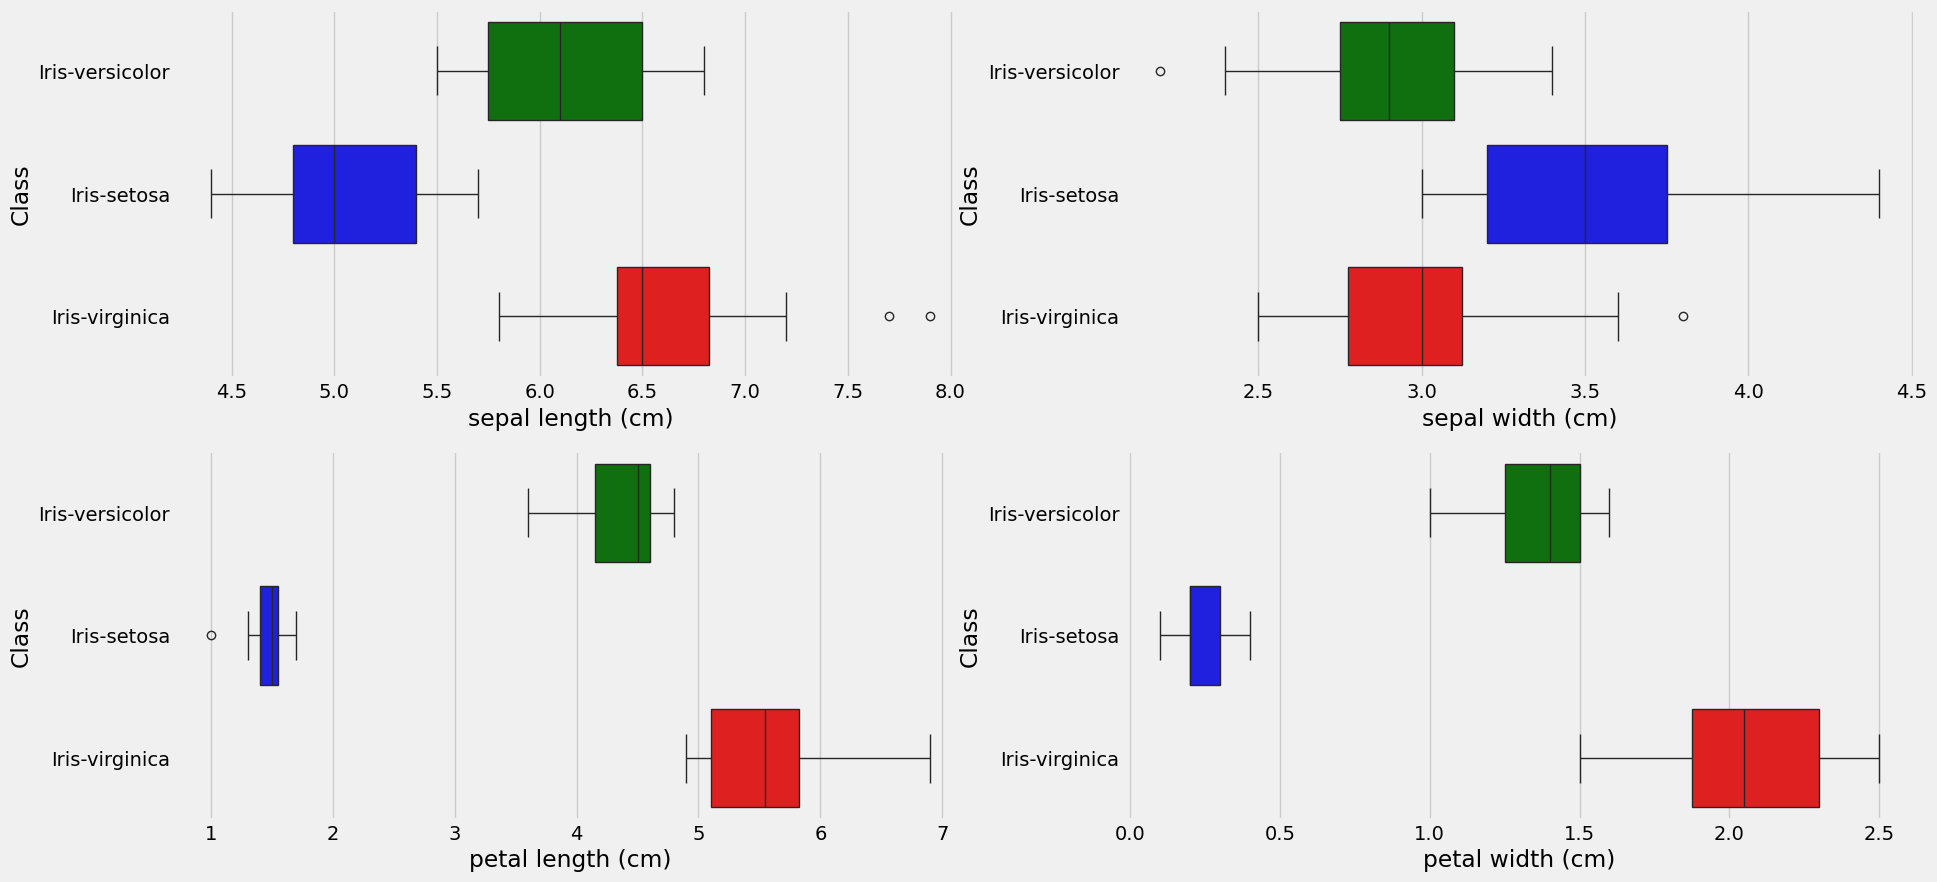

In [35]:
palette = {"Iris-setosa": "blue", "Iris-versicolor": "green", "Iris-virginica": "red"}
fig, axs = plt.subplots(2, 2, figsize=(20, 10))
plt1 = sns.boxplot(data=iris_sample,x="sepal length (cm)", y="Class",palette=palette,  ax=axs[0][0])
plt2 = sns.boxplot(data=iris_sample,x="sepal width (cm)", y="Class",palette=palette, ax=axs[0][1])
plt3 = sns.boxplot(data=iris_sample,x="petal length (cm)", y="Class",palette=palette, ax=axs[1][0])
plt4 = sns.boxplot(data=iris_sample,x="petal width (cm)", y="Class",palette=palette, ax=axs[1][1])

# Distance Calculations and computation complexities

Manhattan Distance

In [36]:
# consider first four attributes as vector (u,v,w,x) point
data_matrix = iris_df.iloc[:, :-1].values
start_time = time.time()
manhattan_dist = squareform(pdist(data_matrix, metric='cityblock'))
manhattan_time = time.time() - start_time
print("Manhattan Distance Matrix:\n", manhattan_dist)
print("Time taken for Manhattan Distance: {:.6f} seconds".format(manhattan_time))

Manhattan Distance Matrix:
 [[0.  0.7 0.8 ... 7.5 7.3 6.6]
 [0.7 0.  0.5 ... 7.2 7.8 6.3]
 [0.8 0.5 0.  ... 7.7 7.9 6.8]
 ...
 [7.5 7.2 7.7 ... 0.  1.2 0.9]
 [7.3 7.8 7.9 ... 1.2 0.  1.5]
 [6.6 6.3 6.8 ... 0.9 1.5 0. ]]
Time taken for Manhattan Distance: 0.002352 seconds


Euclidean Distance

In [37]:
start_time = time.time()
euclidean_dist = squareform(pdist(data_matrix, metric='euclidean'))
euclidean_time = time.time() - start_time
print("Euclidean Distance Matrix:\n", euclidean_dist)
print("Time taken for Euclidean Distance: {:.6f} seconds".format(euclidean_time))

Euclidean Distance Matrix:
 [[0.         0.53851648 0.50990195 ... 4.45982062 4.65080638 4.14004831]
 [0.53851648 0.         0.3        ... 4.49888875 4.71805044 4.15331193]
 [0.50990195 0.3        0.         ... 4.66154481 4.84871117 4.29883705]
 ...
 [4.45982062 4.49888875 4.66154481 ... 0.         0.6164414  0.64031242]
 [4.65080638 4.71805044 4.84871117 ... 0.6164414  0.         0.76811457]
 [4.14004831 4.15331193 4.29883705 ... 0.64031242 0.76811457 0.        ]]
Time taken for Euclidean Distance: 0.000585 seconds


 Chebyshev Distance

In [38]:
start_time = time.time()
chebyshev_dist = squareform(pdist(data_matrix, metric='chebyshev'))
chebyshev_time = time.time() - start_time
print("Chebyshev Distance Matrix:\n", chebyshev_dist)
print("Time taken for Chebyshev Distance: {:.6f} seconds".format(chebyshev_time))

Chebyshev Distance Matrix:
 [[0.  0.5 0.4 ... 3.8 4.  3.7]
 [0.5 0.  0.2 ... 3.8 4.  3.7]
 [0.4 0.2 0.  ... 3.9 4.1 3.8]
 ...
 [3.8 3.8 3.9 ... 0.  0.4 0.6]
 [4.  4.  4.1 ... 0.4 0.  0.5]
 [3.7 3.7 3.8 ... 0.6 0.5 0. ]]
Time taken for Chebyshev Distance: 0.001665 seconds


Mahalanobis Distance

In [39]:
cov_matrix = np.cov(data_matrix, rowvar=False)
inv_cov_matrix = np.linalg.inv(cov_matrix)
start_time = time.time()
mahalanobis_dist = squareform(pdist(data_matrix, metric='mahalanobis', VI=inv_cov_matrix))
mahalanobis_time = time.time() - start_time
print("Mahalanobis Distance Matrix:\n", mahalanobis_dist)
print("Time taken for Mahalanobis Distance: {:.6f} seconds".format(mahalanobis_time))

Mahalanobis Distance Matrix:
 [[0.         1.35971517 0.96949963 ... 2.45066493 3.50495016 2.89533797]
 [1.35971517 0.         0.97318639 ... 2.54627836 4.05670054 3.2991554 ]
 [0.96949963 0.97318639 0.         ... 2.45764476 3.45338089 2.67881128]
 ...
 [2.45066493 2.54627836 2.45764476 ... 0.         2.20436091 2.20685388]
 [3.50495016 4.05670054 3.45338089 ... 2.20436091 0.         2.00393111]
 [2.89533797 3.2991554  2.67881128 ... 2.20685388 2.00393111 0.        ]]
Time taken for Mahalanobis Distance: 0.003095 seconds


Alternatively

In [43]:
# Extract the first four attributes
data = iris_df.iloc[:, :4].values

# Initialize matrices to store distances
num_points = data.shape[0]
manhattan_distances = np.zeros((num_points, num_points))
euclidean_distances = np.zeros((num_points, num_points))
chebyshev_distances = np.zeros((num_points, num_points))
mahalanobis_distances = np.zeros((num_points, num_points))


# Measure time for Manhattan distance
start_time = time.time()
for i in range(num_points):
    for j in range(num_points):
        if i != j:
            u = data[i]
            v = data[j]
            manhattan_distances[i, j] = np.sum(np.abs(u - v))
manhattan_time = time.time() - start_time

# Measure time for Euclidean distance
start_time = time.time()
for i in range(num_points):
    for j in range(num_points):
        if i != j:
            u = data[i]
            v = data[j]
            euclidean_distances[i, j] = np.sqrt(np.sum((u - v)**2))
euclidean_time = time.time() - start_time

# Measure time for Chebyshev distance
start_time = time.time()
for i in range(num_points):
    for j in range(num_points):
        if i != j:
            u = data[i]
            v = data[j]
            chebyshev_distances[i, j] = np.max(np.abs(u - v))
chebyshev_time = time.time() - start_time

# Measure time for Mahalanobis distance
start_time = time.time()
# Compute the covariance matrix and its inverse for Mahalanobis distance
cov_matrix = np.cov(data, rowvar=False)
inv_cov_matrix = np.linalg.inv(cov_matrix)

# Function to compute Mahalanobis distance manually
def mahalanobis_distance(u, v, VI):
    delta = u - v
    return np.sqrt(np.dot(np.dot(delta, VI), delta.T))
for i in range(num_points):
    for j in range(num_points):
        if i != j:
            u = data[i]
            v = data[j]
            mahalanobis_distances[i, j] = mahalanobis_distance(u, v, inv_cov_matrix)
mahalanobis_time = time.time() - start_time

print(f"Time for Manhattan distance: {manhattan_time:.6f} seconds")
print(f"Time for Euclidean distance: {euclidean_time:.6f} seconds")
print(f"Time for Chebyshev distance: {chebyshev_time:.6f} seconds")
print(f"Time for Mahalanobis distance: {mahalanobis_time:.6f} seconds")

Time for Manhattan distance: 0.143004 seconds
Time for Euclidean distance: 0.161611 seconds
Time for Chebyshev distance: 0.153277 seconds
Time for Mahalanobis distance: 0.166214 seconds


Additional Insights

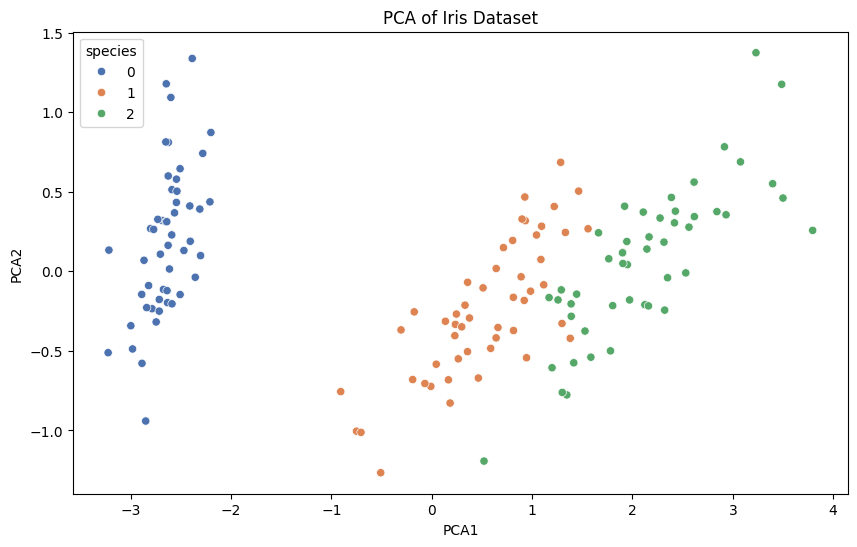

In [ ]:
#PCA for output Class of Iris Flower
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_matrix)
pca_df = pd.DataFrame(data=pca_result, columns=['PCA1', 'PCA2'])
pca_df['species'] = iris.target

plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='species', palette='deep')
plt.title("PCA of Iris Dataset")
plt.show()